In [60]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

#open Dataset f
import os
path = 'Dataset'
files = os.listdir(path)
files.sort()
print(files)   
 


['1.png', '2.png', '3.png', '4.png']


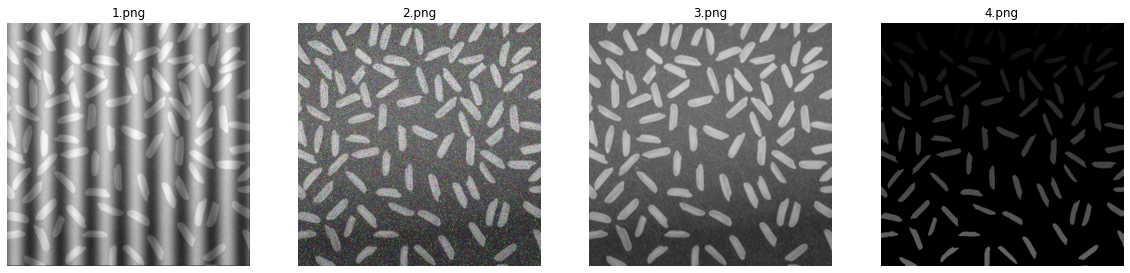

In [61]:
#view image
fig = plt.figure(figsize=(20,20))
for i in range(4):
    img = cv2.imread(os.path.join(path,files[i]))
    fig.add_subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(files[i])
    plt.axis('off')

461 461


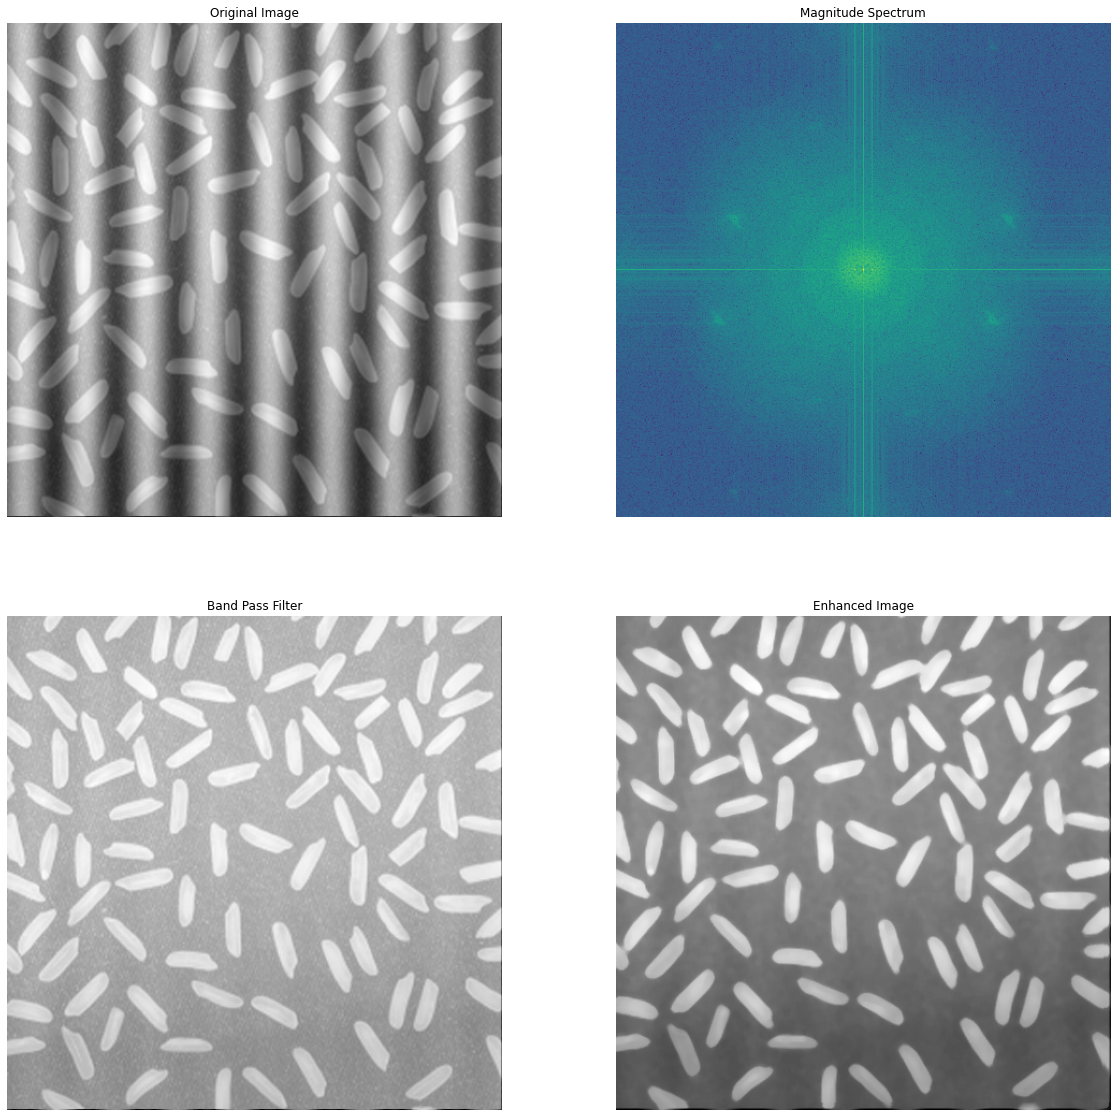

In [62]:
#1.PNG
img = cv2.imread(os.path.join(path,files[0]))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 1+np.log(np.abs(fshift))

#band pass filter
def bandpass_filter(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    #find average value of fshift
    avg = np.mean(fshift)
    max = np.max(fshift)
    print(fshift.shape[0],fshift.shape[1])
    for i in range(fshift.shape[0]):
        for j in range(fshift.shape[1]):
            if i>fshift.shape[0]/4 and j>fshift.shape[1]/4 and fshift[i,j]>max/100 and fshift[i,j]<max:
                fshift[i,j] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
img2 = bandpass_filter(img1)
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1
img3 = gamma_correction(img2,0.5)
img3 = median_blur(img3,7)
fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(magnitude_spectrum)
plt.title('Magnitude Spectrum')
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(img2,cmap= 'gray')
plt.title('Band Pass Filter')
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(img3, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')
array = [img3.copy()]


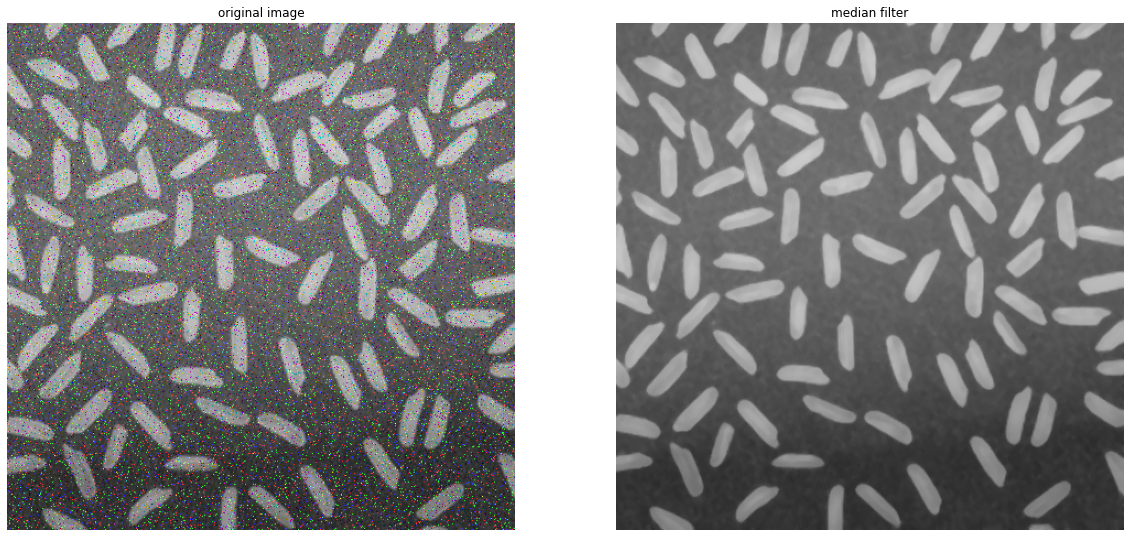

In [63]:
#2.PNG
#median filter
img = cv2.imread(os.path.join(path,files[1]))
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1
img1 = median_blur(img,5)
#compare img vs img1
fig= plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('median filter')
plt.axis('off')
array.append(img1.copy())

In [64]:
#3.PNG
array.append(cv2.blur(cv2.imread(os.path.join(path,files[2])), (5,5)))

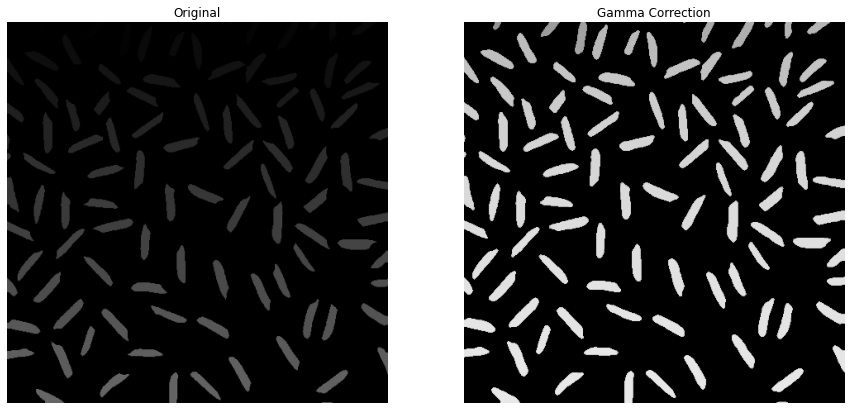

In [65]:
#4.PNG
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1

img = cv2.imread(os.path.join(path,files[3]))
img1= gamma_correction(img,10)
img1 = median_blur(img1,5)
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('Gamma Correction')
plt.axis('off')
array.append(img1.copy())


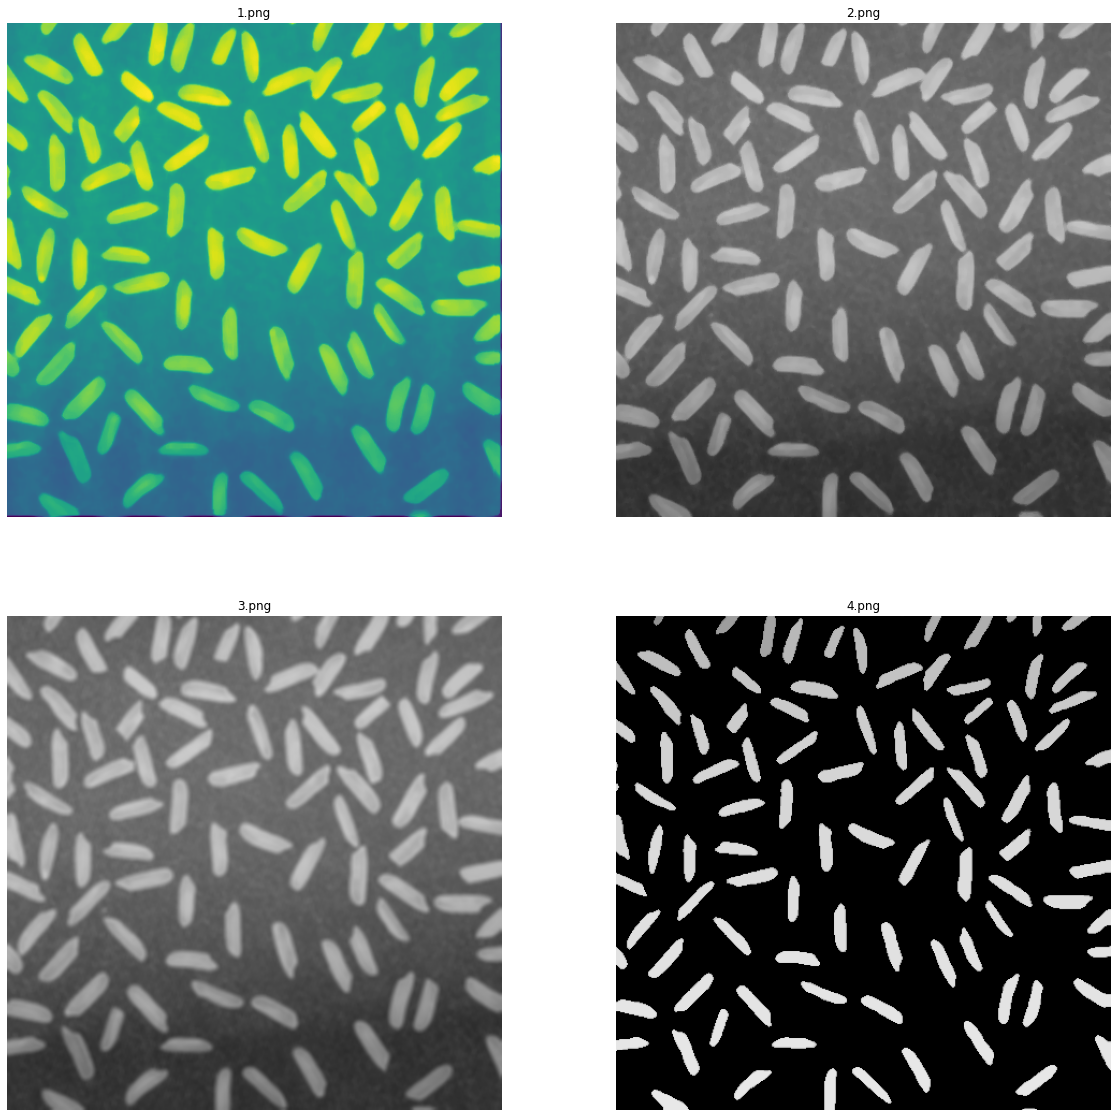

In [66]:
#show all images
fig = plt.figure(figsize=(20,20))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.imshow(array[i])
    plt.title(files[i])
    plt.axis('off')
    

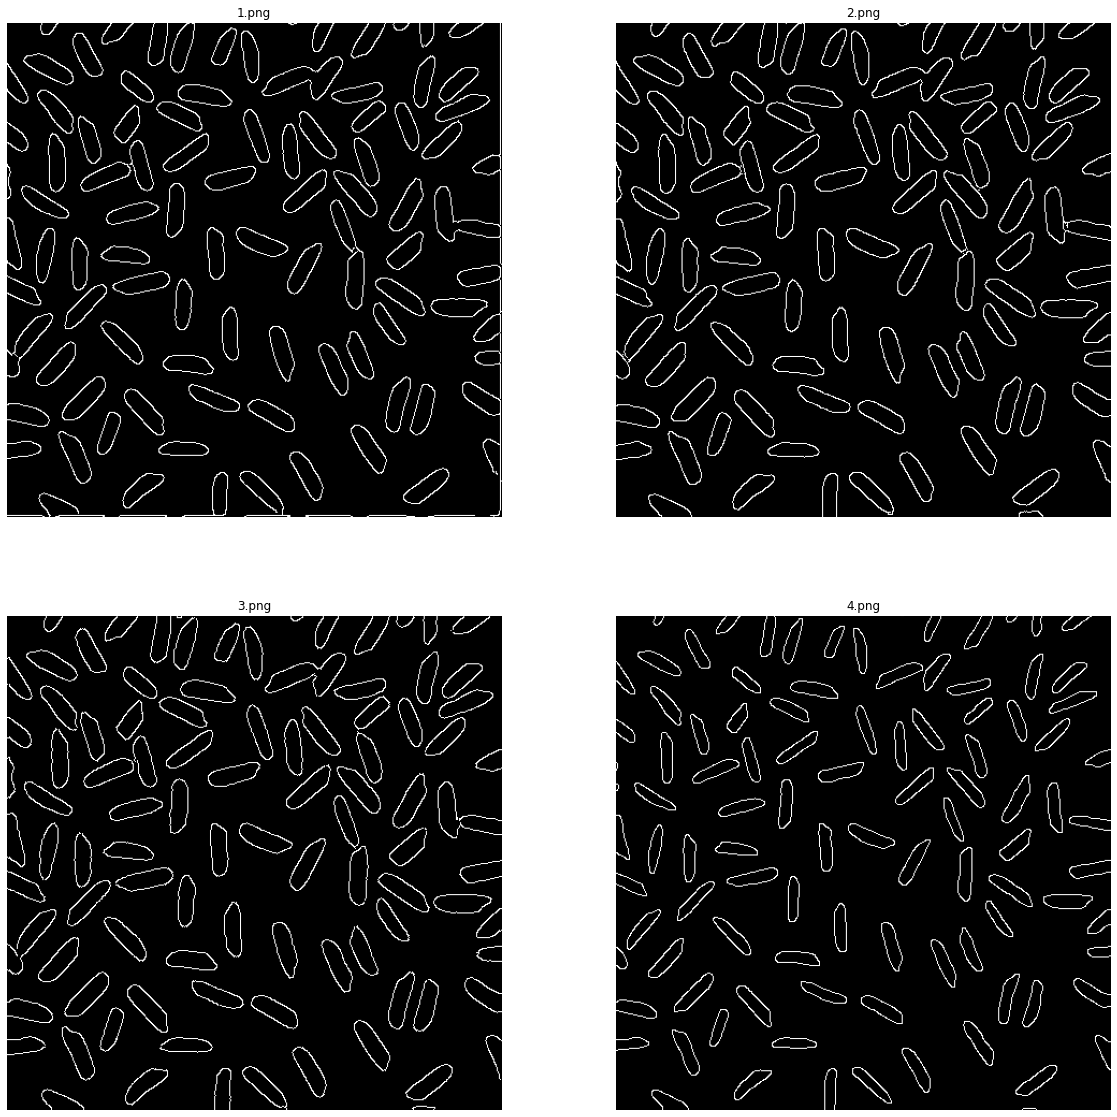

In [67]:
#edge detection using canny
array[0] = np.array(array[0]*255).astype('uint8')
array[3] = np.array(array[3]*255).astype('uint8')
fig = plt.figure(figsize=(20,20))
edge_detection = []
for i in range (4):
    canny_image = cv2.Canny(array[i].copy(),60,120)
    edge_detection.append(canny_image)
    fig.add_subplot(2,2,i+1)
    plt.imshow(canny_image, cmap='gray')
    plt.title(files[i])
    plt.axis('off')



Average area of contours in 1.png is 533.9970760233919
Average area of contours in 2.png is 532.1369047619048
Average area of contours in 3.png is 429.984375
Average area of contours in 4.png is 332.37931034482756


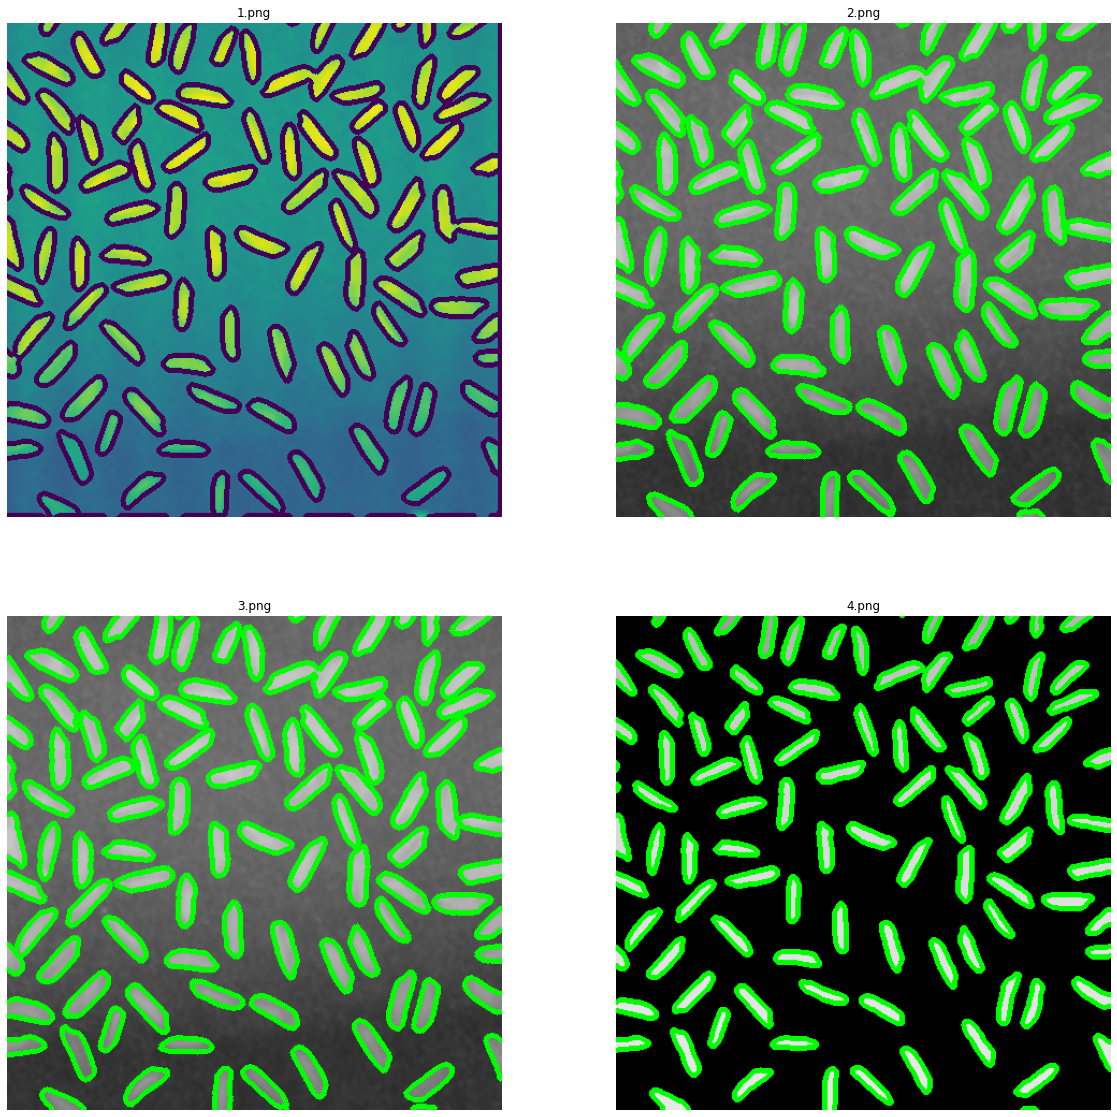

In [68]:
#find contours
fig = plt.figure(figsize=(20,20))
for i in range(4):
    contours, hierarchy = cv2.findContours(edge_detection[i].copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    fig.add_subplot(2,2,i+1)
    plt.imshow(cv2.drawContours(array[i].copy(),contours,-1,(0,255,0),3))
    plt.title(files[i])
    plt.axis('off')
